In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,Normalizer,MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("../ready_to_model_data.csv")
df=df.drop(columns="Unnamed: 0")
df

,PROMISE_STATUS_O,EXTENSION_ELIGIBLE_Y,F0223_NUMBER_OF_EXTENSIONS,lastchannel_Z,REM_TM_RAT_OBS,ApplicantFICOScore,Appl_Debt,F0066_CONTACT_NO_PROMISE_COUNT,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,...,DepreciationRate,Appl_Income,PTI_BOOKED,SalesTax,DOWN_CASH,FINANCED_AMOUNT,F0089_PROMISE_AMT_1,F0180_CURRENT_INTEREST_RATE,BAL_RAT_TRN_6.1,DPD_bool
0,0.0,0.0,3.0,1.0,0.0,0.0,1075.05,12.0,5.0,25.0,...,0.694261,4138.00,0.0964,708.22,0.0,15057.22,382.68,0.1999,0.01,False
1,0.0,1.0,0.0,1.0,0.0,0.0,1138.75,3.0,45.0,3.0,...,0.776757,4166.67,0.1006,0.00,3500.0,20095.17,419.21,0.1425,0.03,False
2,0.0,1.0,0.0,1.0,0.0,551.0,767.83,0.0,3.0,3.0,...,0.834200,2833.33,0.1525,1916.82,5000.0,18764.82,432.01,0.1808,0.03,False
3,1.0,0.0,2.0,1.0,0.0,468.0,1071.20,14.0,-11.0,10.0,...,0.810160,4000.00,0.0903,0.00,3000.0,15077.00,361.22,0.1970,0.02,False
4,0.0,1.0,0.0,1.0,0.0,523.0,726.64,2.0,80.0,7.0,...,0.810160,2069.02,0.1354,880.60,3000.0,10200.54,280.21,0.2134,0.05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62933,0.0,0.0,2.0,1.0,0.0,496.0,1808.27,4.0,17.0,7.0,...,0.776757,4991.09,0.0877,1040.82,2000.0,17252.97,437.95,0.1800,0.01,False
62934,1.0,1.0,0.0,1.0,0.0,458.0,720.43,1.0,-16.0,9.0,...,0.856943,2218.75,0.1728,841.68,2100.0,15382.68,402.48,0.2140,0.03,False
62935,0.0,1.0,1.0,1.0,0.0,567.0,852.94,3.0,320.0,13.0,...,0.629297,2810.34,0.1321,872.19,1500.0,15924.07,371.17,0.1650,0.04,False
62936,0.0,0.0,4.0,1.0,0.0,447.0,1026.95,11.0,31.0,16.0,...,0.629297,3704.74,0.1338,1152.30,4000.0,18715.30,500.00,0.2425,0.00,True


In [3]:
df["DPD_bool"]=df["DPD_bool"].map({True:1,False:0})
df

,PROMISE_STATUS_O,EXTENSION_ELIGIBLE_Y,F0223_NUMBER_OF_EXTENSIONS,lastchannel_Z,REM_TM_RAT_OBS,ApplicantFICOScore,Appl_Debt,F0066_CONTACT_NO_PROMISE_COUNT,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,...,DepreciationRate,Appl_Income,PTI_BOOKED,SalesTax,DOWN_CASH,FINANCED_AMOUNT,F0089_PROMISE_AMT_1,F0180_CURRENT_INTEREST_RATE,BAL_RAT_TRN_6.1,DPD_bool
0,0.0,0.0,3.0,1.0,0.0,0.0,1075.05,12.0,5.0,25.0,...,0.694261,4138.00,0.0964,708.22,0.0,15057.22,382.68,0.1999,0.01,0
1,0.0,1.0,0.0,1.0,0.0,0.0,1138.75,3.0,45.0,3.0,...,0.776757,4166.67,0.1006,0.00,3500.0,20095.17,419.21,0.1425,0.03,0
2,0.0,1.0,0.0,1.0,0.0,551.0,767.83,0.0,3.0,3.0,...,0.834200,2833.33,0.1525,1916.82,5000.0,18764.82,432.01,0.1808,0.03,0
3,1.0,0.0,2.0,1.0,0.0,468.0,1071.20,14.0,-11.0,10.0,...,0.810160,4000.00,0.0903,0.00,3000.0,15077.00,361.22,0.1970,0.02,0
4,0.0,1.0,0.0,1.0,0.0,523.0,726.64,2.0,80.0,7.0,...,0.810160,2069.02,0.1354,880.60,3000.0,10200.54,280.21,0.2134,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62933,0.0,0.0,2.0,1.0,0.0,496.0,1808.27,4.0,17.0,7.0,...,0.776757,4991.09,0.0877,1040.82,2000.0,17252.97,437.95,0.1800,0.01,0
62934,1.0,1.0,0.0,1.0,0.0,458.0,720.43,1.0,-16.0,9.0,...,0.856943,2218.75,0.1728,841.68,2100.0,15382.68,402.48,0.2140,0.03,0
62935,0.0,1.0,1.0,1.0,0.0,567.0,852.94,3.0,320.0,13.0,...,0.629297,2810.34,0.1321,872.19,1500.0,15924.07,371.17,0.1650,0.04,0
62936,0.0,0.0,4.0,1.0,0.0,447.0,1026.95,11.0,31.0,16.0,...,0.629297,3704.74,0.1338,1152.30,4000.0,18715.30,500.00,0.2425,0.00,1


In [4]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["DPD_bool","F0381_DAYS_DELINQUENT_360","D5P_TOT_1"]),df["DPD_bool"],test_size=0.2)


In [9]:
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm =scaler.transform(X_test)

In [5]:
dt_1 = DecisionTreeClassifier(max_depth=2,random_state=42)
dt_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

<ipython-input-6-e5bd75ac8836>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


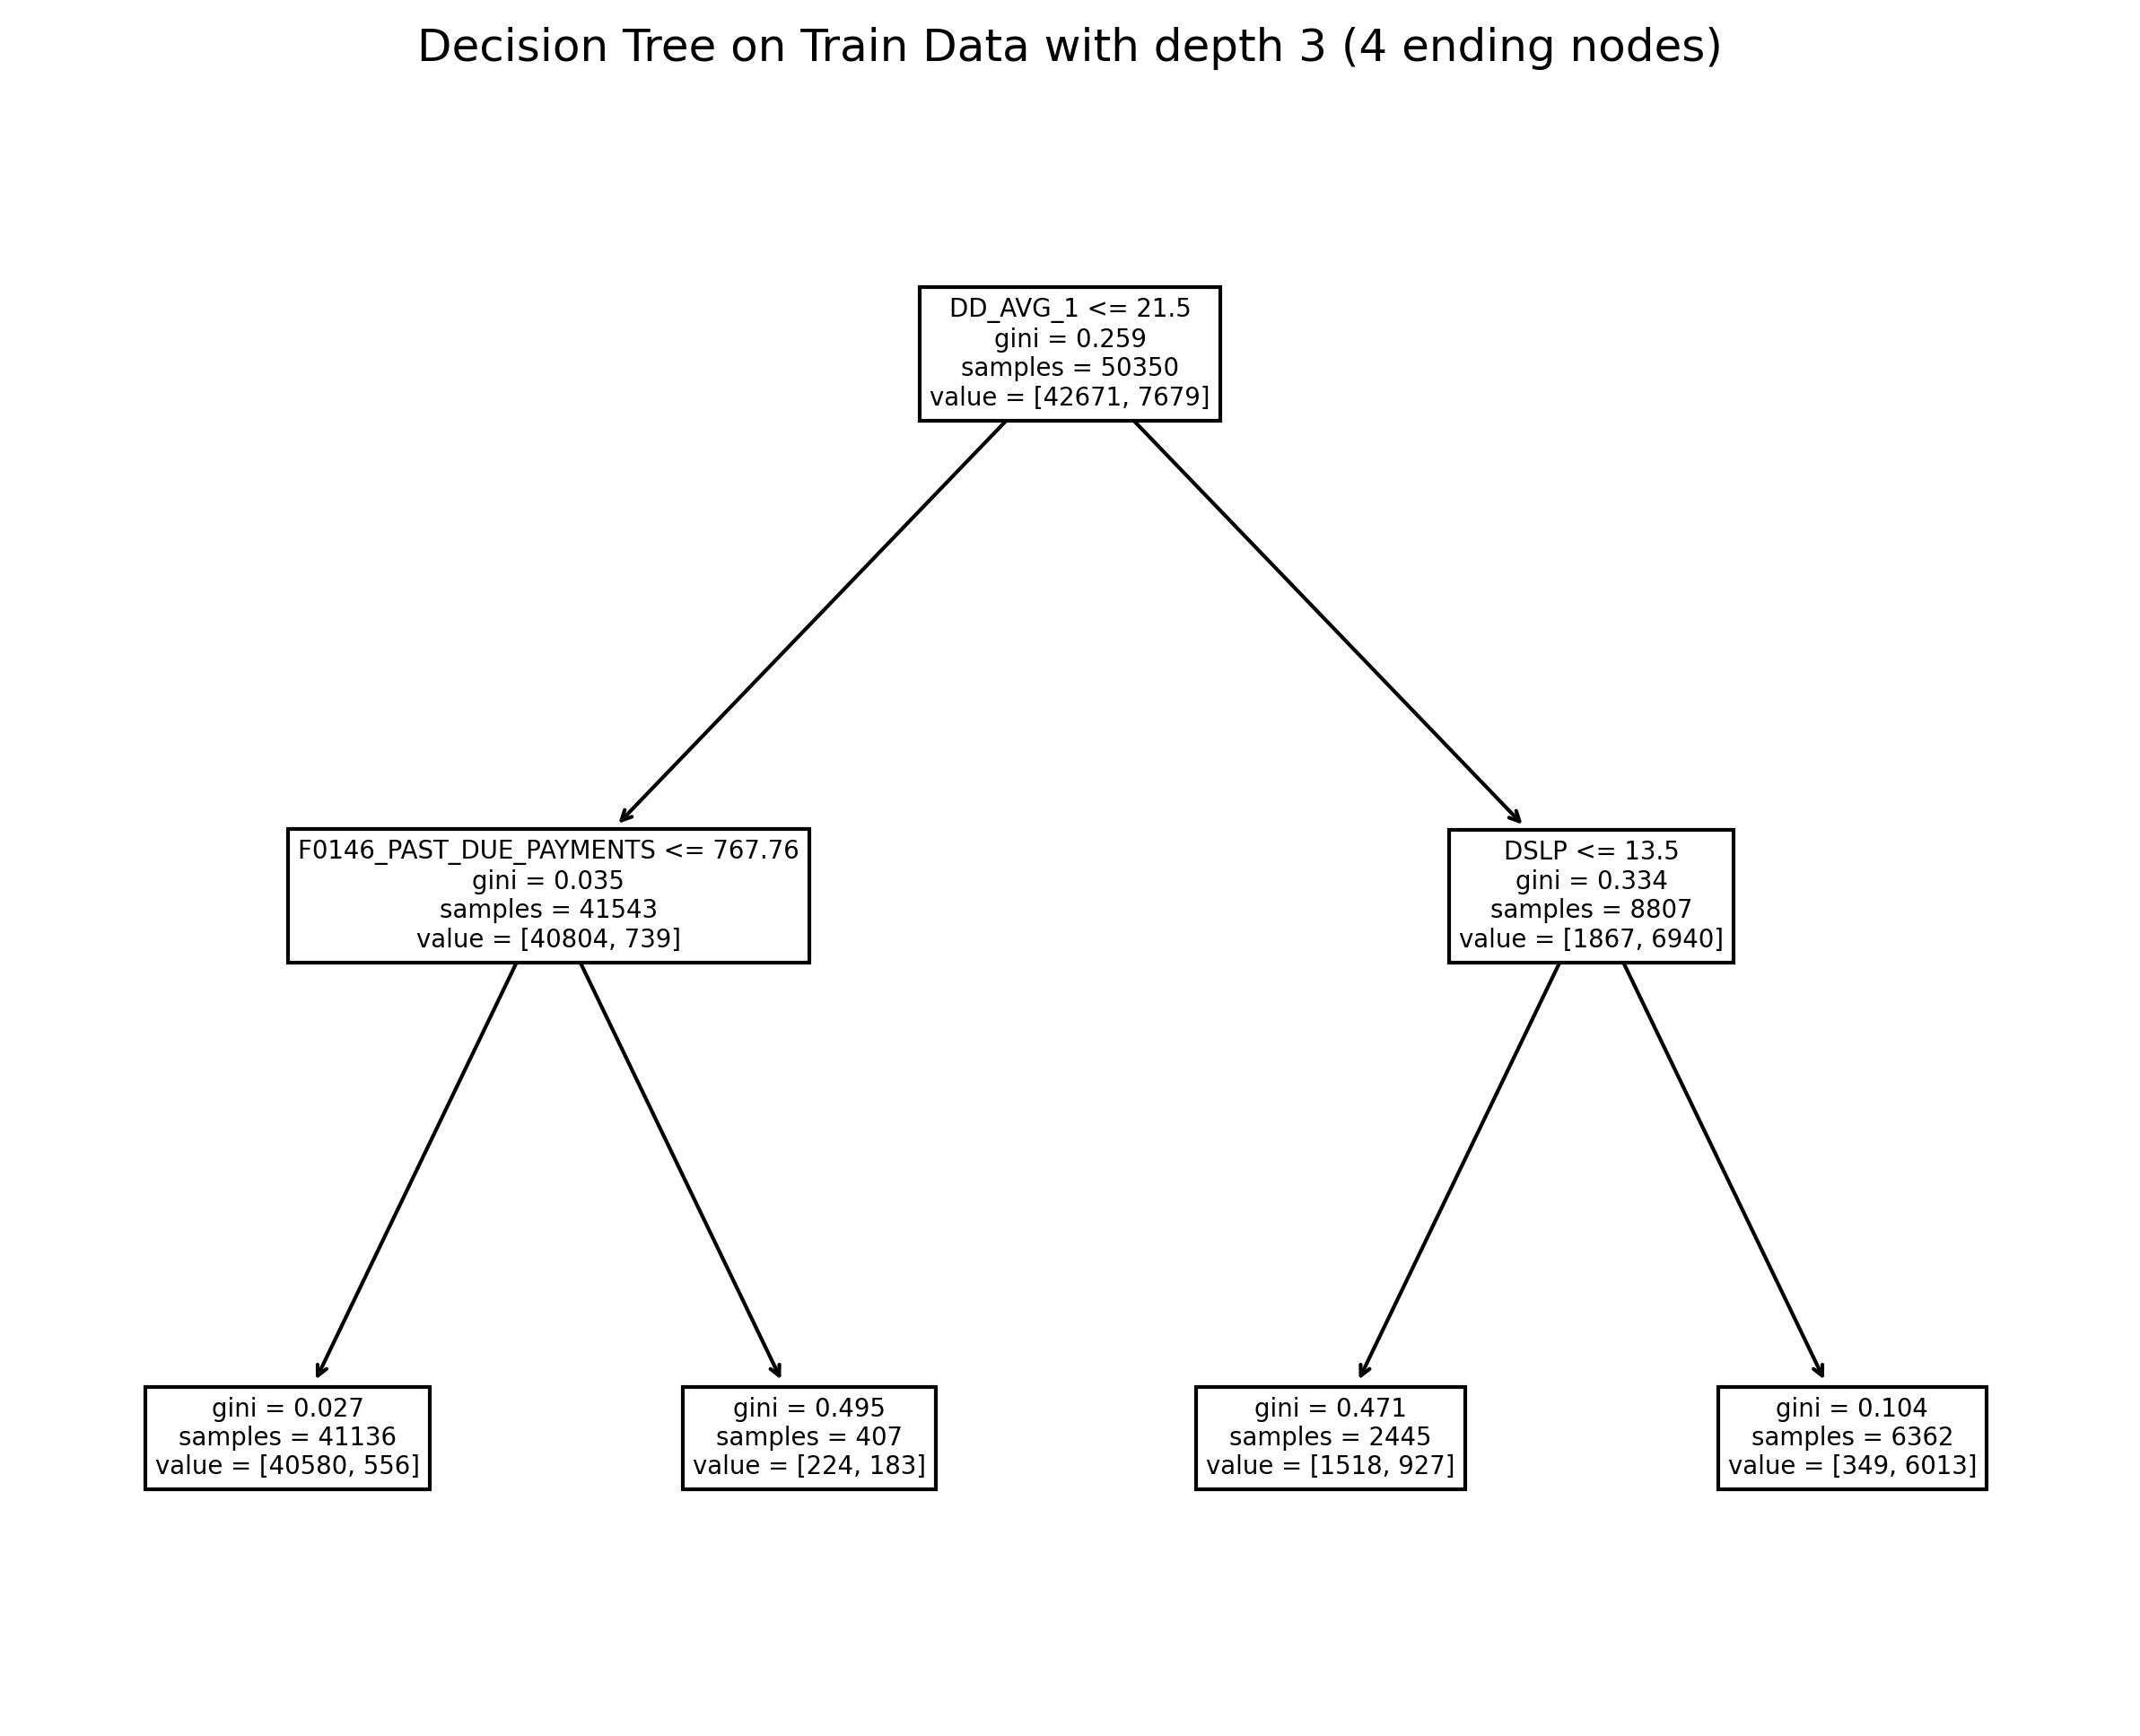

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(dt_1,feature_names=X_train.columns)
axes.title.set_text("Decision Tree on Train Data with depth 3 (4 ending nodes)")
fig.savefig("../images/Decision_tree_train_model.png")
fig.show()


In [7]:
y_train_output= dt_1.predict(X_train)
print("Train data Accuracy - Decision Tree")
print(classification_report(y_train,y_train_output))
print("\nROC Score :")
print(roc_auc_score(y_train,y_train_output))

Train data Accuracy - Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42671
           1       0.95      0.78      0.86      7679

    accuracy                           0.96     50350
   macro avg       0.95      0.89      0.92     50350
weighted avg       0.96      0.96      0.96     50350


ROC Score :
0.8874329052197659


In [8]:
y_test_output = dt_1.predict(X_test)
print("Test data Accuracy - Decision Tree")
print(classification_report(y_test,y_test_output))
print("\nROC Score :")
print(roc_auc_score(y_test,y_test_output))

Test data Accuracy - Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10640
           1       0.94      0.77      0.84      1948

    accuracy                           0.96     12588
   macro avg       0.95      0.88      0.91     12588
weighted avg       0.96      0.96      0.95     12588


ROC Score :
0.8791433473313673


In [10]:
#Let's do Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_norm,y_train)


LogisticRegression()

In [11]:
y_train_output_lr=lr.predict(X_train_norm)
print("Train data Accuracy")
print(classification_report(y_train,y_train_output_lr))

Train data Accuracy
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42671
           1       0.95      0.93      0.94      7679

    accuracy                           0.98     50350
   macro avg       0.97      0.96      0.96     50350
weighted avg       0.98      0.98      0.98     50350



In [12]:
roc_auc_score(y_train,y_train_output_lr)


0.9598498838814072

In [13]:
y_test_output_lr=lr.predict(X_test)
print("Test data Accuracy")
print(classification_report(y_test,y_test_output_lr))

Test data Accuracy
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10640
           1       0.98      0.16      0.28      1948

    accuracy                           0.87     12588
   macro avg       0.93      0.58      0.60     12588
weighted avg       0.89      0.87      0.83     12588



In [14]:
roc_auc_score(y_test,y_test_output_lr)

0.5816438876966543

In [66]:
lr.predict_proba(X_train_norm)

array([[9.87301994e-01, 1.26980060e-02],
       [9.99999426e-01, 5.74407294e-07],
       [9.99993432e-01, 6.56808566e-06],
       ...,
       [8.87877263e-04, 9.99112123e-01],
       [1.43047115e-02, 9.85695289e-01],
       [9.99999685e-01, 3.15056996e-07]])

In [67]:
lr.predict_proba(X_test_norm)

array([[9.01711709e-01, 9.82882913e-02],
       [2.04567988e-05, 9.99979543e-01],
       [8.59540346e-01, 1.40459654e-01],
       ...,
       [9.99892035e-01, 1.07965366e-04],
       [9.99993296e-01, 6.70414344e-06],
       [1.41582572e-01, 8.58417428e-01]])

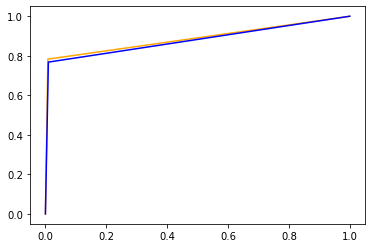

In [15]:
fpr,tpr,threshold = roc_curve(y_train,y_train_output)
fpr1,tpr1,threshold1=roc_curve(y_test,y_test_output)
plt.plot(fpr, tpr,color='orange', label='Decision Tree AUC-ROC curve')
plt.plot(fpr1, tpr1,color='blue', label='Decision Tree AUC-ROC curve')


In [17]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 1.1 MB/s eta 0:00:01


In [18]:
#xgboost model

import xgboost as xgb
xg_1 = xgb.XGBClassifier(n_estimators=50)
xg_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [19]:
xg_1.fit(X_train_norm,y_train)
y_train_output_xg=xg_1.predict(X_train_norm)
roc_auc_score(y_train,y_train_output_xg)

0.9998229044705075

In [23]:
X_train_norm=pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm=pd.DataFrame(X_test_norm,columns=X_test.columns)

In [24]:
val={'Feature':X_train_norm.columns,'Importance':xg_1.feature_importances_}
imp_features_df=pd.DataFrame(val)
imp_features_df.sort_values(by="Importance",ascending=False)

,Feature,Importance
24,DD_AVG_1,0.416350
16,DSLP,0.279989
25,BAL_RAT_TRN_6,0.059267
0,PROMISE_STATUS_O,0.037278
15,F0146_PAST_DUE_PAYMENTS,0.031783
23,D31P_TOT_6,0.027418
4,REM_TM_RAT_OBS,0.021014
14,BALANCE_PERCENT_LOAN,0.016236
18,PMT_RAT_OBS,0.014331
34,FINANCED_AMOUNT,0.013155


In [25]:
final_columns=imp_features_df[imp_features_df["Importance"]>0.01]
final_columns

,Feature,Importance
0,PROMISE_STATUS_O,0.037278
4,REM_TM_RAT_OBS,0.021014
14,BALANCE_PERCENT_LOAN,0.016236
15,F0146_PAST_DUE_PAYMENTS,0.031783
16,DSLP,0.279989
18,PMT_RAT_OBS,0.014331
23,D31P_TOT_6,0.027418
24,DD_AVG_1,0.416350
25,BAL_RAT_TRN_6,0.059267
34,FINANCED_AMOUNT,0.013155


In [27]:
xg_2 = xgb.XGBClassifier(n_estimators=50)
xg_2.fit(X_train_norm[final_columns["Feature"]],y_train)
y_train_output_xg2 = xg_2.predict(X_train_norm[final_columns["Feature"]])

In [28]:
print("\nTrain Data AUC Score : ")
roc_auc_score(y_train,y_train_output_xg2)


Train Data AUC Score : 


0.9973631415932089

In [29]:
print("\Test Data AUC Score : ")
roc_auc_score(y_test,xg_2.predict(X_test_norm[final_columns["Feature"]]))

\Test Data AUC Score : 


0.991262389804079

In [30]:
#Grid Search
from sklearn.model_selection import GridSearchCV
xgb_gcv=xgb.XGBClassifier()

In [31]:
params = {
        'max_depth': [3, 4, 5, 6],
        'learning_rate' : [0.1,0.01,1,0.001],
        'n_estimators' : [50,100,150,200]
}

In [32]:
grid=GridSearchCV(estimator=xgb_gcv,param_grid=params,scoring='roc_auc',n_jobs=4)
# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3 )


In [33]:
grid.fit(X_train_norm[final_columns["Feature"]],y_train,verbose=100)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [34]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [35]:
grid_table=pd.DataFrame(grid.cv_results_)
print("XGBoost Grid Search All Results")
grid_table

XGBoost Grid Search All Results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.708202,0.004573,0.009714,0.000572,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.998617,0.998914,0.998561,0.999037,0.998702,0.998766,0.000181,36
1,1.345864,0.002987,0.011471,0.000375,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999295,0.999534,0.999264,0.999516,0.999392,0.999400,0.000110,30
2,2.070709,0.056129,0.014170,0.000974,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999449,0.999661,0.999431,0.999598,0.999518,0.999531,0.000088,12
3,3.149873,0.130031,0.019006,0.000200,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999505,0.999719,0.999473,0.999611,0.999545,0.999571,0.000087,9
4,1.071139,0.023567,0.011720,0.000383,0.1,4,50,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999183,0.999439,0.999191,0.999440,0.999252,0.999301,0.000115,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5.727426,0.060813,0.025986,0.001019,0.001,5,200,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.997471,0.997865,0.995976,0.996994,0.997559,0.997173,0.000661,49
60,1.664143,0.098104,0.013656,0.000819,0.001,6,50,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996615,0.996723,0.997626,0.997881,0.997424,0.997254,0.000500,48
61,3.392726,0.206100,0.019107,0.001159,0.001,6,100,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996631,0.996930,0.997754,0.997930,0.997771,0.997403,0.000521,47
62,5.291068,0.273392,0.024961,0.001691,0.001,6,150,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.996777,0.998024,0.997809,0.997943,0.997836,0.997678,0.000457,45


In [160]:
grid_table.to_csv("../grid_search_params_table.csv")

In [36]:
best_estimator=grid.best_estimator_
best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
print("Train Data Roc score on best model")
roc_auc_score(y_train,best_estimator.predict(X_train_norm[final_columns["Feature"]]))


Train Data Roc score on best model


0.9954736785684675

In [38]:
print("Test Data Roc score best model")
roc_auc_score(y_test,best_estimator.predict(X_test_norm[final_columns["Feature"]]))



Test Data Roc score best model


0.9912371084281546

In [175]:
#Grid Search code in one cell
from sklearn.model_selection import GridSearchCV
xgb_gcv=xgb.XGBClassifier()
params = {
        'max_depth': [3, 4, 5, 6],
        'learning_rate' : [0.1,0.01,1,0.001],
        'n_estimators' : [50,100,150,200]
}
grid=GridSearchCV(estimator=xgb_gcv,param_grid=params,scoring='roc_auc',n_jobs=4)
grid.fit(X_train_norm[final_columns["Feature"]],y_train,verbose=100)
print("Running best model ")
best_estimator=grid.best_estimator_
print("Train Data Roc score on best model")
print(roc_auc_score(y_train,best_estimator.predict(X_train_norm[final_columns["Feature"]])))
print("Test Data Roc score best model")
print(roc_auc_score(y_test,best_estimator.predict(X_test_norm[final_columns["Feature"]])))
grid_table=pd.DataFrame(grid.cv_results_)
print("\n\nXGBoost Grid Search All Results saving into a csv")
grid_table.to_csv("../grid_search_params_table.csv")
print("\n\n\n\t\t \t\t\tGrid search parameters table")
grid_table


Running best model 
Train Data Roc score on best model
0.998408996255393
Test Data Roc score best model
0.9879307717847609


XGBoost Grid Search All Results saving into a csv



		 			Grid search parameters table


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.578922,0.012665,0.015199,0.000987,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.998685,0.999020,0.999092,0.998931,0.999077,0.998961,0.000149,35
1,2.962682,0.073876,0.016395,0.001568,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999234,0.999440,0.999571,0.999460,0.999562,0.999453,0.000122,26
2,4.125550,0.047205,0.018648,0.001247,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999361,0.999535,0.999692,0.999591,0.999672,0.999570,0.000119,17
3,5.669535,0.051725,0.019715,0.000474,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.999405,0.999579,0.999735,0.999649,0.999721,0.999618,0.000120,7
4,1.929256,0.018095,0.014845,0.001038,0.1,4,50,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.999037,0.999349,0.999566,0.999404,0.999527,0.999377,0.000187,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,12.656256,0.491767,0.027519,0.003955,0.001,5,200,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.997277,0.994428,0.998224,0.997321,0.992960,0.996042,0.002001,52
60,4.111306,0.194905,0.021890,0.001062,0.001,6,50,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.997004,0.994778,0.997487,0.998258,0.993404,0.996186,0.001810,51
61,9.104190,0.495320,0.026183,0.003164,0.001,6,100,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.997079,0.994977,0.997774,0.998289,0.993395,0.996303,0.001840,49
62,15.112495,0.644868,0.029209,0.004918,0.001,6,150,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.997830,0.995133,0.997817,0.998357,0.994689,0.996765,0.001533,47


In [68]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [78]:
import shap

In [79]:
explainer = shap.TreeExplainer(xg_2)

In [80]:
explainer

In [83]:
X_train_norm

array([[ 3.06606322, -1.2527054 ,  2.45315827, ..., -0.39010776,
        -0.20182466,  0.93717544],
       [-0.32615114,  0.79827229, -0.71510178, ...,  0.21276135,
        -0.82449281,  0.53470722],
       [ 3.06606322, -1.2527054 , -0.71510178, ..., -1.0084232 ,
         0.95231277, -1.07516569],
       ...,
       [-0.32615114,  0.79827229,  0.55220224, ...,  0.96837754,
         0.35165814, -1.47763392],
       [-0.32615114, -1.2527054 , -0.71510178, ...,  1.99404054,
         2.24167612, -1.47763392],
       [-0.32615114,  0.79827229, -0.71510178, ..., -0.01484105,
         0.51204236, -0.67269746]])

In [ ]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(max_depth=1, learning_rate=0.5).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.TabularPartitions(X, sample=100)
def f(x):
    return shap.links.identity(model.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])